<a href="https://colab.research.google.com/github/YuliiaChorna1/DataScience-03.2-Model-Training-Retraining-Sklearn/blob/main/linear_models_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sklearn

## sklearn.linear_model

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Лінійна регресія

#### Генерування даних

In [ ]:
data, target, coef = datasets.make_regression(n_features=2, n_informative=1, n_targets=1,
                                              noise=5., coef=True, random_state=2)

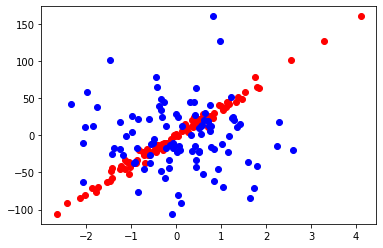

In [ ]:
pylab.scatter(data[:,0], target, color="r")
pylab.scatter(data[:,1], target, color="b")

In [ ]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target,
                                                                                     test_size=0.3)

#### LinearRegression

In [ ]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [ ]:
print(test_labels)

[ 44.41658249 -36.69728864  41.1068411   12.47089016 -91.477377
 -70.11132234  44.66274342 -37.31870104  20.87713077  23.87701013
 -14.97110322 -21.48288019 -12.98848753 -32.71074998  -1.42235396
 -84.32102748  13.31981235 -42.44469577 -10.29545833 -52.37232463
 -26.87743177 -16.85466265 -80.80239408 126.64909941 -10.27758354
 -11.18242389 -19.36956003  18.17188553  -4.38652971  13.02656201]


In [ ]:
print(predictions)

[ 44.26503842 -27.42039137  36.7402556   20.03621673 -93.39694723
 -66.36417021  50.88753682 -35.07085542  13.67264164  31.73690939
 -12.52109704 -24.38514927 -16.41140205 -43.48079873  -0.56783725
 -81.34937795  14.51912517 -39.20811293 -11.09482259 -40.64900059
 -28.06872529 -16.33618562 -78.33769265 125.5225152   -7.59763153
 -12.98181032 -31.99556123  18.4030131   -4.90026022  18.77790833]


In [ ]:
metrics.mean_absolute_error(test_labels, predictions)

3.9932230711394907

In [ ]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring="neg_mean_absolute_error", cv=10)
print(f"mean: {linear_scoring.mean()}, std: {linear_scoring.std()}")

mean: -4.070071498779696, std: 1.07371044928902


In [ ]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [ ]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring=scorer, cv=10)
print(f"mean: {linear_scoring.mean()}, std: {linear_scoring.std()}")

mean: 4.070071498779696, std: 1.07371044928902


In [ ]:
coef

array([38.07925837,  0.        ])

In [ ]:
linear_regressor.coef_

array([38.24765461,  0.41105872])

In [ ]:
linear_regressor.intercept_

-0.3191351244086571

In [ ]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [ ]:
print("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0],
                                                  linear_regressor.coef_[1],
                                                  linear_regressor.intercept_))

y = 38.25*x1 + 0.41*x2 + -0.32


#### Lasso

In [ ]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [ ]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print("mean: {lasso_scoring.mean()}, std: {lasso_scoring.std()}")

mean: {lasso_scoring.mean()}, std: {lasso_scoring.std()}


In [ ]:
print(lasso_regressor.coef_)

[37.39846496  0.        ]


In [ ]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [ ]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]))

y = 37.40*x1 + 0.00*x2
